In [1]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Creating Symbolic Link
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
%cd /mydrive/sheep_object_detection/

/content/gdrive/My Drive/sheep_object_detection


In [4]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 15968, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 15968 (delta 84), reused 113 (delta 75), pack-reused 15831
Receiving objects: 100% (15968/15968), 14.60 MiB | 8.61 MiB/s, done.
Resolving deltas: 100% (10953/10953), done.


In [5]:
cd yolov5

/content/gdrive/My Drive/sheep_object_detection/yolov5


In [6]:
!pip install -r requirements.txt  # install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 595.4/595.4 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.8 MB/s eta 0:00:00


In [7]:
# Import Libraries
import matplotlib.pyplot as plt
import PIL
from IPython.display import Image
from PIL import Image as IPImage
import numpy as np
import glob

In [8]:
# Training
!python train.py --data data.yaml --epochs 20 --weights 'yolov5s.pt' --cfg yolov5s.yaml  --batch-size 16 

train: weights=yolov5s.pt, cfg=yolov5s.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=20, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-176-g76ea9ed Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, h

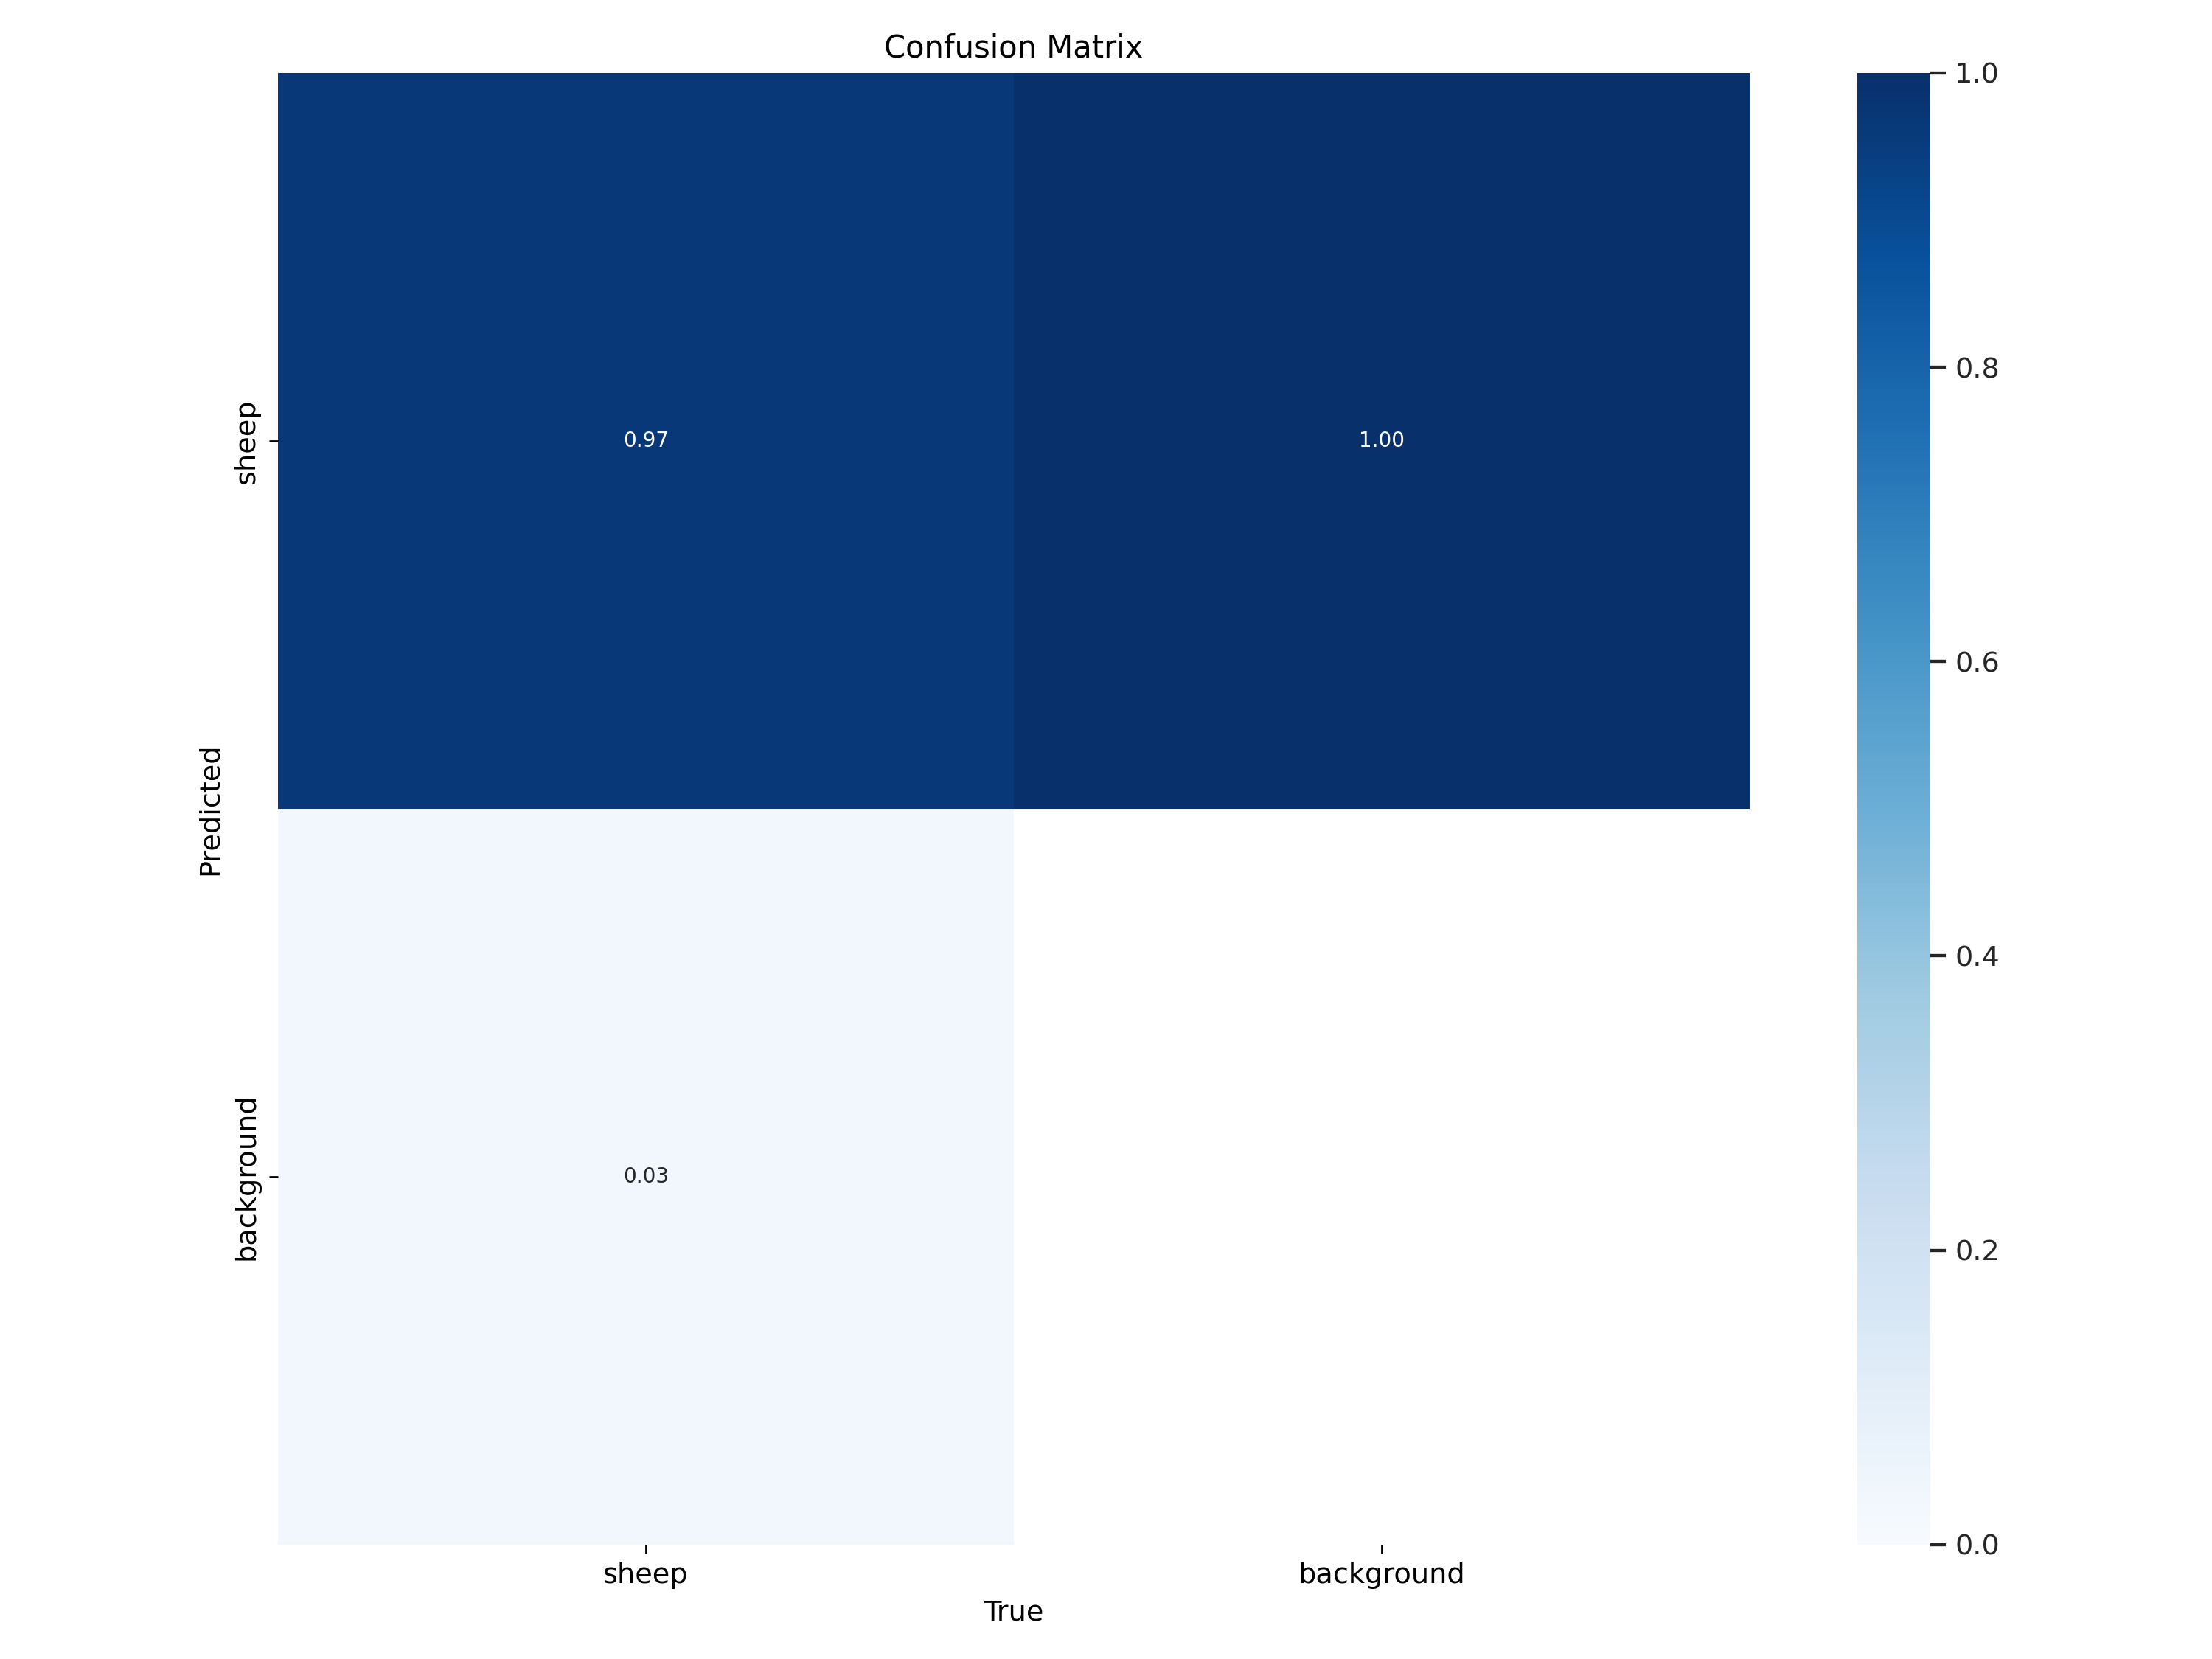

In [9]:
# Displaying the confusion matrix
Image(filename='runs/train/exp/confusion_matrix.png', width=600)

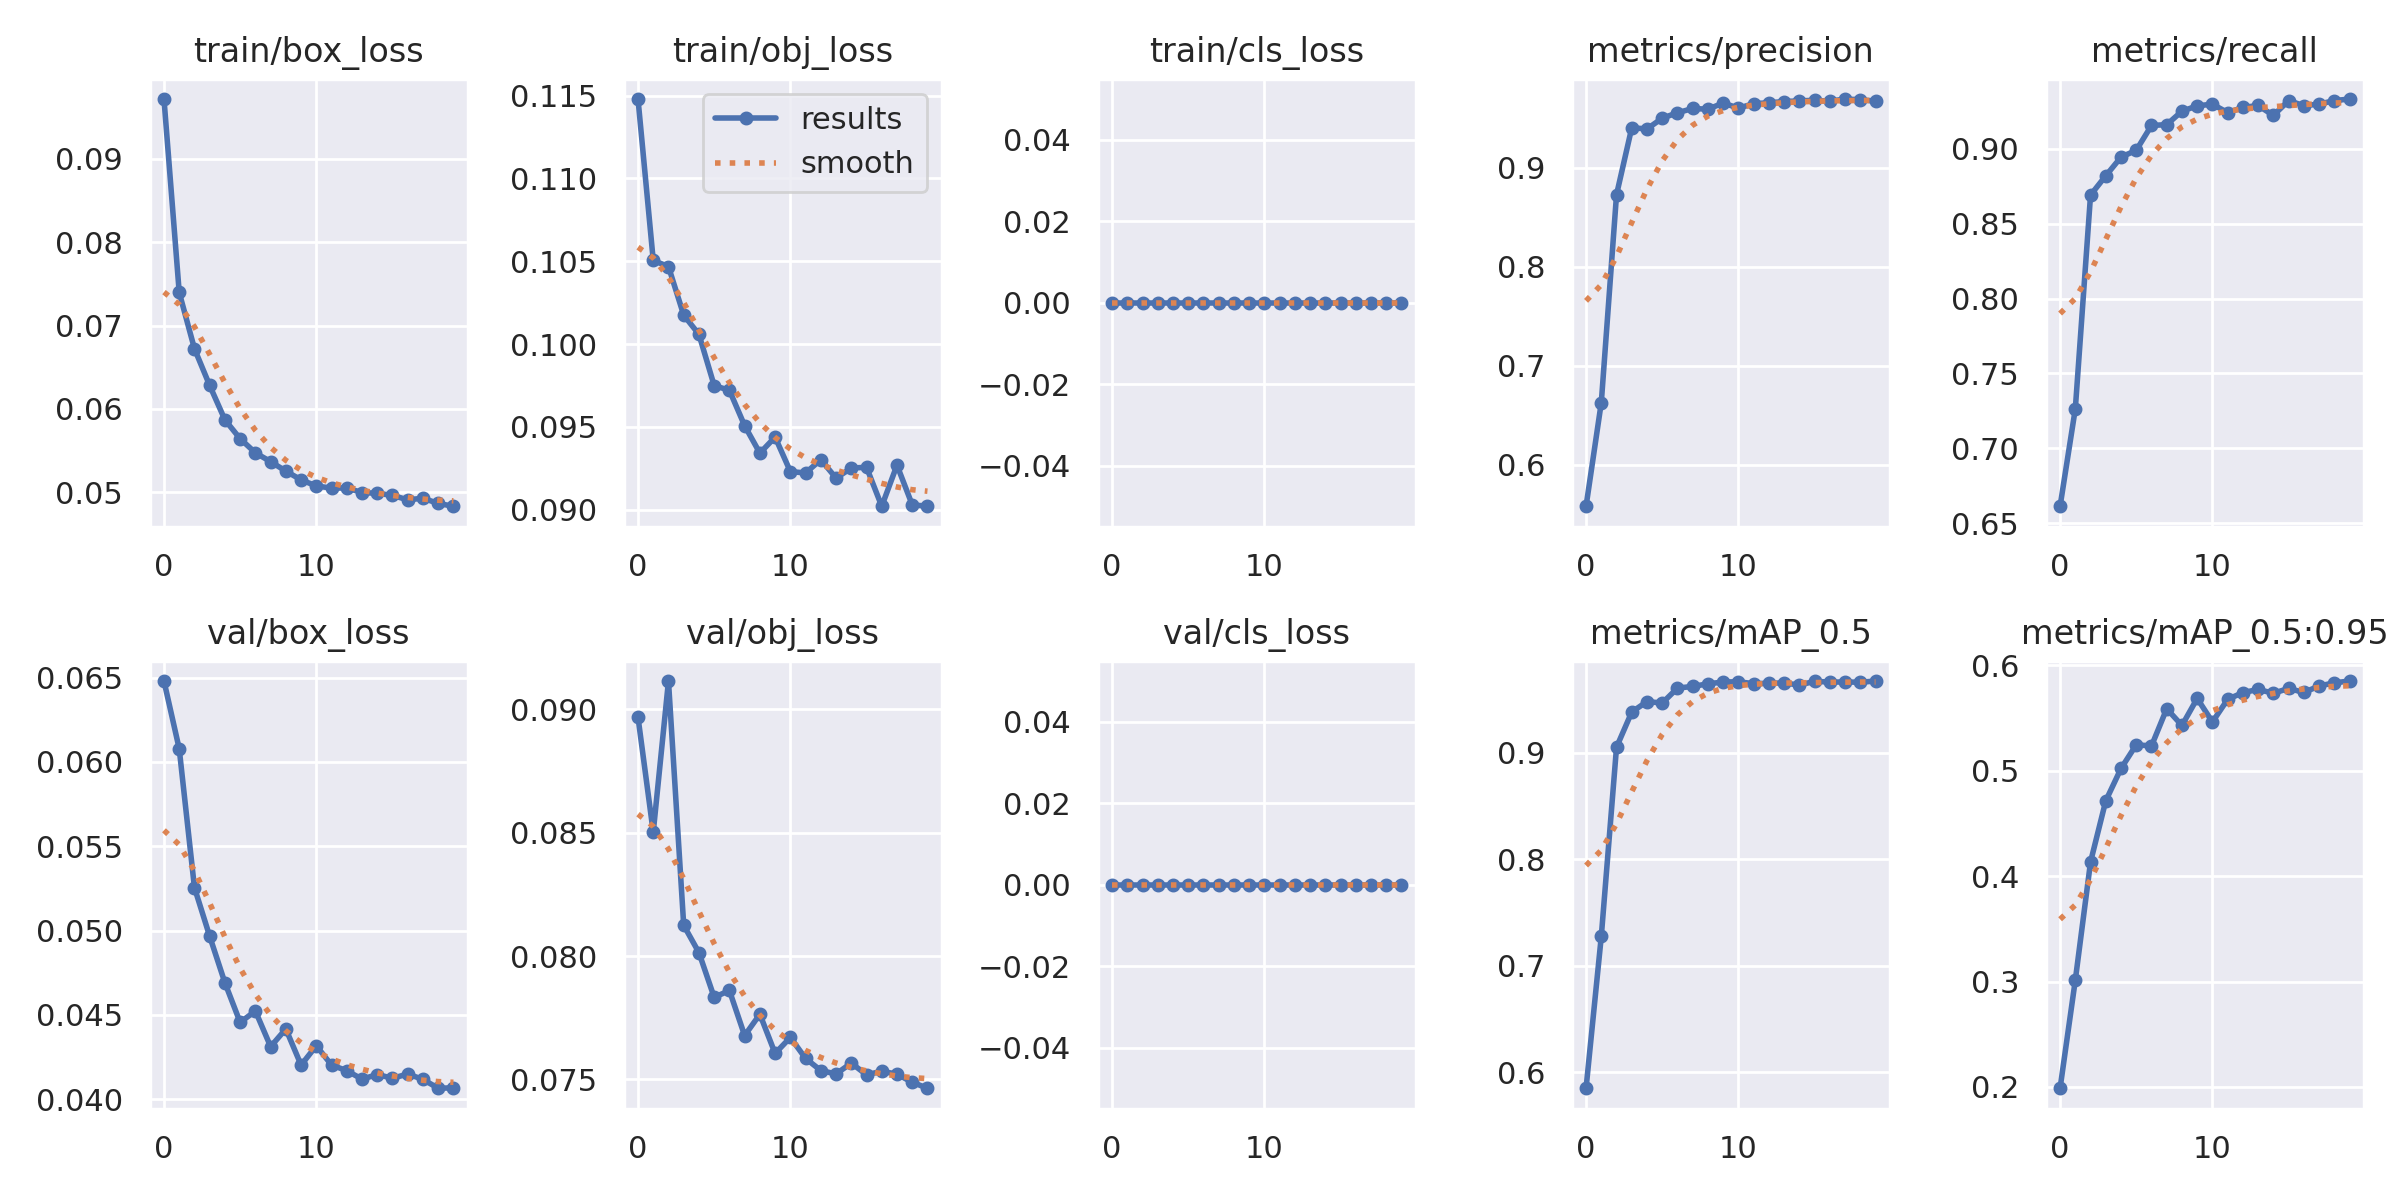

In [10]:
# Displaying model evaluation results
Image(filename='runs/train/exp/results.png', width=600)

In [11]:
# Testing
!python val.py --data test_data.yaml --weights runs/train/exp/weights/best.pt

val: data=test_data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-176-g76ea9ed Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/gdrive/MyDrive/sheep_object_detection/yolov5/test/labels.cache... 174 images, 1 backgrounds, 0 corrupt: 100% 174/174 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:18<00:00,  3.13s/it]
                   all        174       5603      0.973      0.935      0.969      0.591
Speed: 0.7ms pre-process, 9.3ms inference, 7.1ms NMS per image at shape (32, 3, 640, 640)
Resu

In [12]:
# Inference
!python detect.py --weights runs/train/exp/weights/best.pt --source test/images 

detect: weights=['runs/train/exp/weights/best.pt'], source=test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-176-g76ea9ed Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/174 /content/gdrive/MyDrive/sheep_object_detection/yolov5/test/images/DJI_0004_0262_jpg.rf.14f93587a02be481b46b466ea33580a9.jpg: 640x640 20 sheeps, 11.2ms
image 2/174 /content/gdrive/MyDrive/sheep_object_detection/yolov5/test/images/DJI_0004_0285_jpg.rf.3437cf4895f48307e807216955ab9d02.jpg: 640x640 24 sheeps, 11.3ms
image 3/174 /content/gdriv

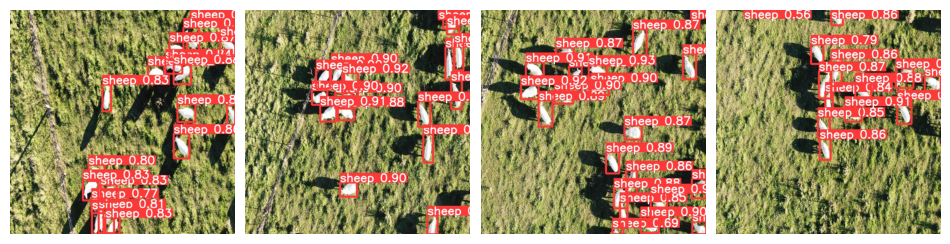

In [13]:
# Displaying the results of inference on the images

image_paths = glob.glob('runs/detect/exp/*.jpg')[10:14]
fig, axes = plt.subplots(1, 4, figsize=(12, 3))

for i, image_path in enumerate(image_paths):
    img = IPImage.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.show()